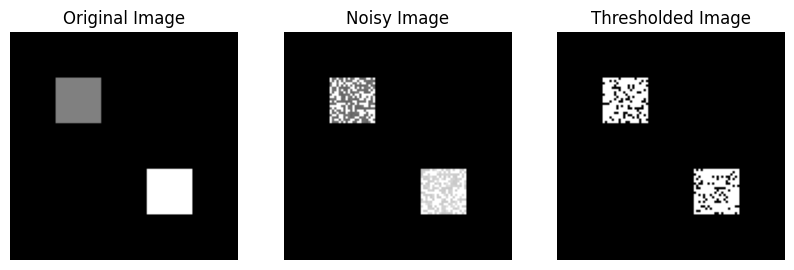

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def otsu_threshold(image):
    # 1. Compute Histogram
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist = hist.ravel() / hist.sum()

    # 2. Compute CDF
    cdf = hist.cumsum()

    # 3. Compute Cumulative Mean
    mean = np.arange(256) * hist
    cumulative_mean = mean.cumsum()

    # 4. Compute Between-Class Variance
    variance = np.zeros(256)
    for i in range(1, 256):
        p1 = cdf[i]
        p2 = 1 - p1
        if p1 == 0 or p2 == 0:
            continue
        mu1 = cumulative_mean[i]
        mu2 = cumulative_mean[-1] - mu1
        variance[i] = p1 * p2 * ((mu1 - mu2) ** 2)

    # 5. Find Optimal Threshold
    optimal_threshold = np.argmax(variance)

    # 6. Threshold the Image
    _, thresholded = cv2.threshold(image, optimal_threshold, 255, cv2.THRESH_BINARY)

    return thresholded

# Creating a sample image with 2 objects and a background
image = np.zeros((100, 100), dtype=np.uint8)
image[20:40, 20:40] = 100  # First object
image[60:80, 60:80] = 200  # Second object

# Adding Gaussian noise only to the squares
noise = np.random.normal(0, 10, (100, 100)).astype(np.uint8)
noisy_image = image.copy()
noisy_image[20:40, 20:40] = cv2.add(image[20:40, 20:40], noise[20:40, 20:40])
noisy_image[60:80, 60:80] = cv2.add(image[60:80, 60:80], noise[60:80, 60:80])

# Applying Otsu's thresholding only to the squares
thresholded_image = noisy_image.copy()
thresholded_image[20:40, 20:40] = otsu_threshold(noisy_image[20:40, 20:40])
thresholded_image[60:80, 60:80] = otsu_threshold(noisy_image[60:80, 60:80])

# Displaying results using Matplotlib
plt.figure(figsize=(10, 6))

# Original Image
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Noisy Image
plt.subplot(132)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

# Thresholded Image
plt.subplot(133)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.show()

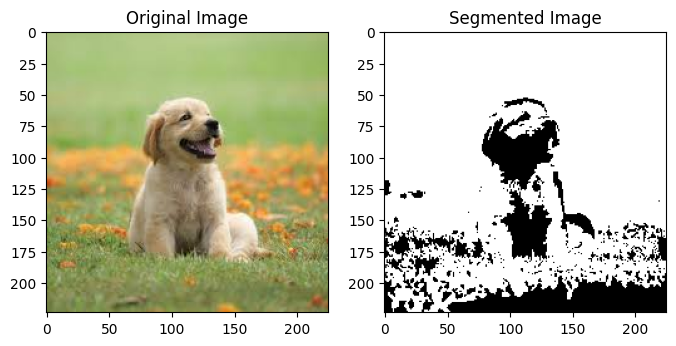

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function for segmentation
def region_growing(image, seeds, threshold):
    height, width = image.shape
    segmented = np.zeros_like(image)
    visited = np.zeros_like(image)
    stack = []

    image = image.astype(np.float32)

    for seed in seeds:
        stack.append(seed)

    while len(stack) > 0:
        current_point = stack.pop()
        y, x = current_point

        if visited[y, x] == 1:
            continue

        visited[y, x] = 1

        if abs(image[y, x] - image[seeds[0][0], seeds[0][1]]) <= threshold:
            segmented[y, x] = 255

            if y - 1 >= 0:
                stack.append((y - 1, x))
            if y + 1 < height:
                stack.append((y + 1, x))
            if x - 1 >= 0:
                stack.append((y, x - 1))
            if x + 1 < width:
                stack.append((y, x + 1))

    return segmented

# Main function
if __name__ == "__main__":
    # Load the image on a white background
    color_image = cv2.imread('image1.jpg')
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

    # Define seeds for region growing
    seeds = [(30, 30)] 

    # Set threshold for region growing
    threshold = 50 

    # Perform region growing segmentation
    segmented_image = region_growing(gray_image, seeds, threshold)

    # Display original image and segmented image
    plt.figure(figsize=(8, 4))
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.subplot(122)
    plt.imshow(segmented_image, cmap='gray')
    plt.title('Segmented Image')
    plt.show()